## Introduction
This notebook was built for the Depp Learning Image Classification Challenge Project. We were given a set of lung x-rays and from these we built a model that predicts whether the patient has Covid, Pneumonia, or normal lungs. 

### Import Necessary libraries and modules

In [1127]:
#importing all modules
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


{'Cell': {'cm_config': {'lineNumbers': False, 'lineWrapping': True}}}

### Reading, Batching and Performing Data Augmentations

In [1129]:
#class used for generating batches of augmented data which are used to help prevent overfitting
#data augmentations allow the dat to be invariant to the agmentations performed
#found this article very helpful when deciding the augmentations to perform:
#https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
train_data_gen = ImageDataGenerator(rescale=1.0/255.0, zoom_range=[0.95, 1.05],
                                             width_shift_range=0.1, height_shift_range=0.1, 
                                             brightness_range=(0.7, 1.5), rotation_range=10)
valid_data_gen = ImageDataGenerator(rescale=1.0/255.0)
#defining batch_size 
batch_size = 32
#DirectoryIteratory objects for batching and performing data augmentations
#If you want to save images to directory, uncomment the end of the train call to flow_from_directory
train = train_data_gen.flow_from_directory('/Users/valhalla/data_science/codeacademy/deep_learning/cc_lung_image_classification/train', shuffle=False, class_mode='categorical', color_mode='grayscale', target_size = (256,256), batch_size=batch_size)#, save_to_dir='/Users/valhalla/data_science/codeacademy/deep_learning/cc_lung_image_classification/ImageDataGenerator') 
valid = valid_data_gen.flow_from_directory('/Users/valhalla/data_science/codeacademy/deep_learning/cc_lung_image_classification/test', shuffle=False, class_mode='categorical', color_mode='grayscale', target_size = (256,256))


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


### Visualizing the first batch of images

(32, 256, 256, 1)


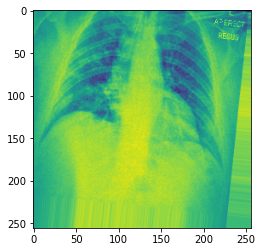

(32, 256, 256, 1)
(32, 256, 256, 1)


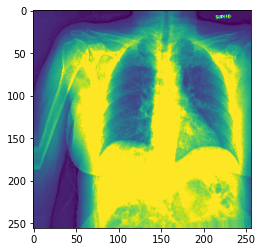

(32, 256, 256, 1)
(32, 256, 256, 1)


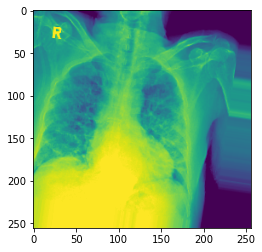

(32, 256, 256, 1)
(32, 256, 256, 1)


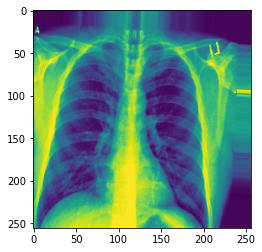

(32, 256, 256, 1)
(32, 256, 256, 1)


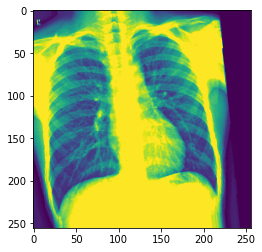

(32, 256, 256, 1)
(32, 256, 256, 1)


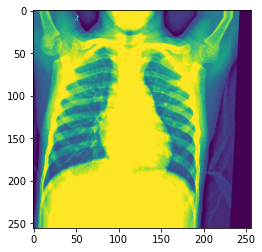

(32, 256, 256, 1)
(32, 256, 256, 1)


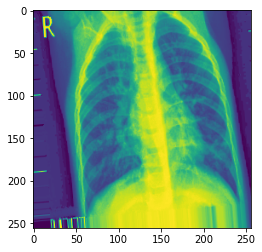

(32, 256, 256, 1)
(32, 256, 256, 1)


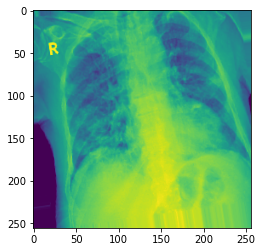

(32, 256, 256, 1)
(32, 256, 256, 1)


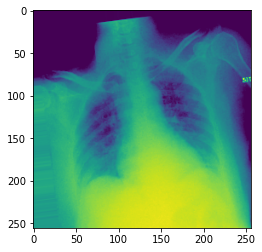

(32, 256, 256, 1)
(32, 256, 256, 1)


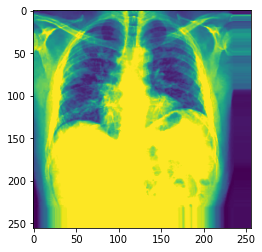

(32, 256, 256, 1)
(32, 256, 256, 1)


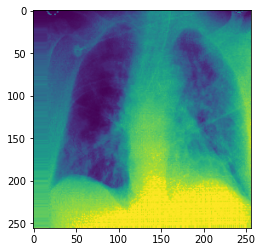

(32, 256, 256, 1)
(32, 256, 256, 1)


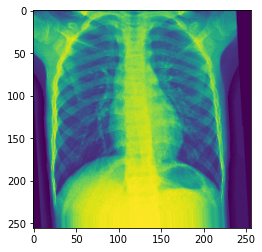

(32, 256, 256, 1)
(32, 256, 256, 1)


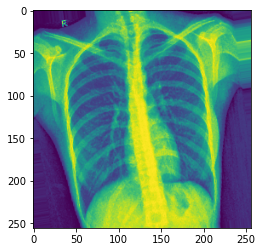

(32, 256, 256, 1)
(32, 256, 256, 1)


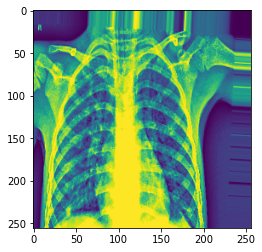

(32, 256, 256, 1)
(32, 256, 256, 1)


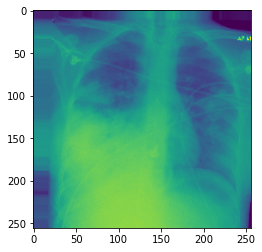

(32, 256, 256, 1)
(32, 256, 256, 1)


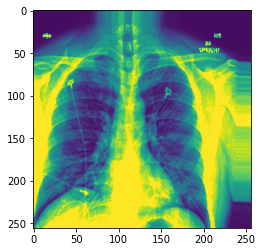

(32, 256, 256, 1)
(32, 256, 256, 1)


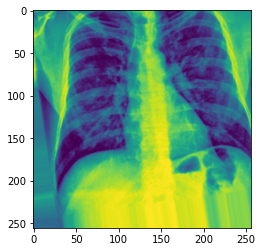

(32, 256, 256, 1)
(32, 256, 256, 1)


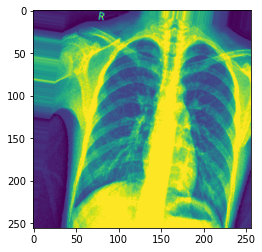

(32, 256, 256, 1)
(32, 256, 256, 1)


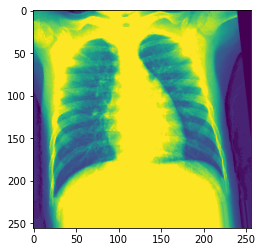

(32, 256, 256, 1)
(32, 256, 256, 1)


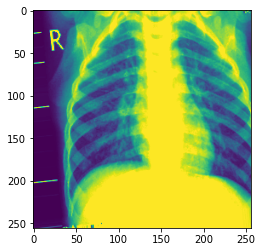

(32, 256, 256, 1)
(32, 256, 256, 1)


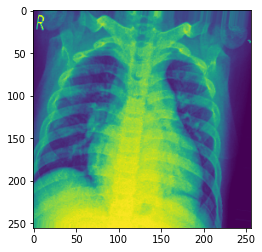

(32, 256, 256, 1)
(32, 256, 256, 1)


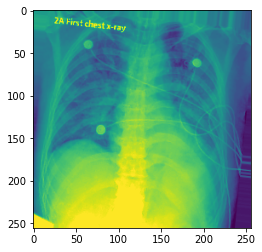

(32, 256, 256, 1)
(32, 256, 256, 1)


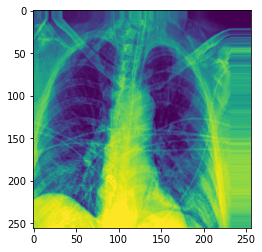

(32, 256, 256, 1)
(32, 256, 256, 1)


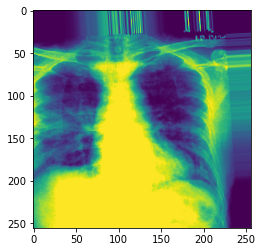

(32, 256, 256, 1)
(32, 256, 256, 1)


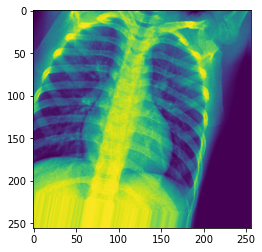

(32, 256, 256, 1)
(32, 256, 256, 1)


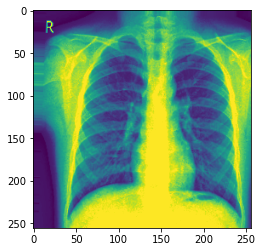

(32, 256, 256, 1)
(32, 256, 256, 1)


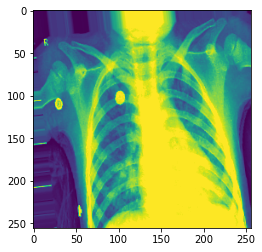

(32, 256, 256, 1)
(32, 256, 256, 1)


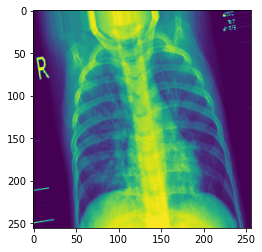

(32, 256, 256, 1)


In [1103]:
#There are differnt batch sizes as the last batch has 27 images instead of 32. Iam only keeping those, for 
#visualization purposes, with batch_size == 32 so that we can visualize the convolutions later

for i in range(batch_size):
    img_any, labels = train.next()
    if img_any.shape[0] == 32:
        img = img_any
        print(img.shape)
        plt.imshow(np.squeeze(img[i]))
        plt.show()
        print(img.shape)

Looking at the first batch of data, we not only see some of the augmentations performed, but we can also see some issues with our images that might disrupt performance such as text and over exposure.

### Building the CNN

In [1104]:
#import layers modules
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

#instantiate model and add all layers
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(256, 256, 1)))
model.add(Conv2D(16, 3, strides=1, activation="relu", padding='same')) 
model.add(MaxPooling2D(
    pool_size=(3, 3)))
model.add(Conv2D(32, 3, strides=1, activation="relu")) 
model.add(MaxPooling2D(
    pool_size=(3,3)))
model.add(Conv2D(16, 5, strides=2, activation="relu")) 
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(3, 3)))
#Model must be flattened (turned into a 1-D array) before going into a Dense (full-connected) layer
model.add(Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
#Using softmax as output activation function fas it is a multi-class classification problem
model.add(tf.keras.layers.Dense(3, activation="softmax"))

print(model.summary())

Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_217 (Conv2D)          (None, 256, 256, 16)      160       
_________________________________________________________________
max_pooling2d_180 (MaxPoolin (None, 85, 85, 16)        0         
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 83, 83, 32)        4640      
_________________________________________________________________
max_pooling2d_181 (MaxPoolin (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 12, 12, 16)        12816     
_________________________________________________________________
max_pooling2d_182 (MaxPoolin (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_79 (Flatten)         (None, 256)             

#### Tips to understand model summary
grayscale so input has 1 channel  
Conv2d layers: output_channels * (input_channels * window_size + 1) = num_parameters  
Conv2d = 32 * (1*(3*3)+1)  
Conv2d = 64 * (32 * (3*3) + 1)  
Conv2d = 128 * (64 * (3*3) + 1)   

Dense layers: output_size * (input_size + 1) == num_parameters   
Dense = 16 * (18432 + 1)  

output_size = ((input_size-kernel_size+2P)/S) + 1  
P = size f zero padding  
S = strides  

### Compiling and Fitting Model

In [1105]:
#compiling model with metrics and optimizer
model.compile(
    optimizer=tf.keras.optimizers.Adam(),#learning_rate=0.005),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()])

#### Metrics
categorical crossentropy: Computes the crossentropy loss between the labels and predictions.  
categorical accuracy: Calculates how often predictions match the true labels.  

In [1106]:
#Used REduce learning rate instead of early stopping
#Early Stopping monitors the loss and stop after 100 epochs that it does not get better
from tensorflow.keras.callbacks import EarlyStopping
#early stopping showed me that a good number of epochs is 120
es = EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=100)

In [1107]:
#Reduce learning rate on plateau reduces the learnig rate when the loss parameter does not get better
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', mode='min', verbose=0, patience=100, factor=0.2)

In [1108]:
#Model checkpoint stores the model weights during the best epoch to feed into the model later
#the weights are stored in an hdf5 file 
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)

In [1109]:
#fitting the model using Reduce learning rate and model checkpoint. I did not use early stopping
history = model.fit(
       train,
       steps_per_epoch=train.samples/batch_size,
       epochs=120, 
       validation_data=valid, verbose=0, callbacks = [reduce_lr,checkpoint])

### Model Evaluation

Text(0, 0.5, 'Categorical Accuracy')

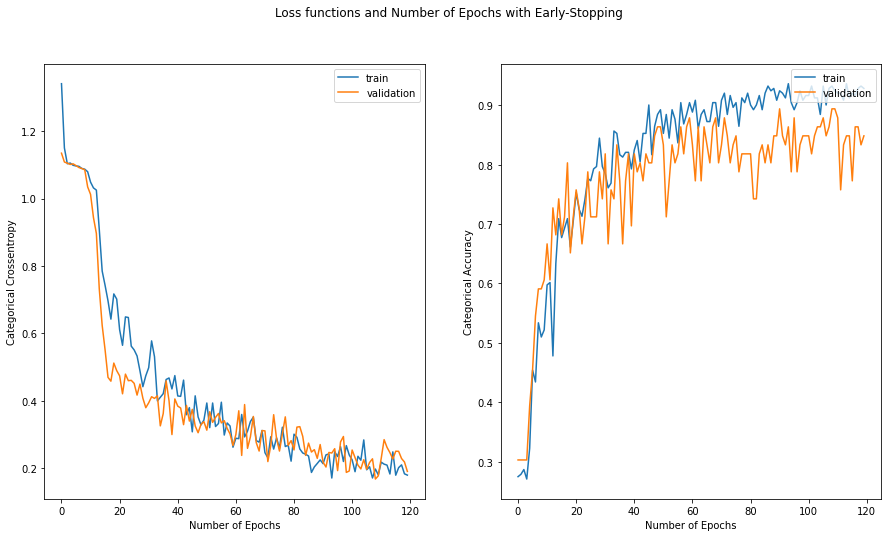

In [1110]:
#Visualizing the loss parameters
from matplotlib import pyplot as plt
#creating figure area for 2 plots side-by-side
fig, axs = plt.subplots(1,2, figsize=(15, 8))
plt.suptitle('Loss functions and Number of Epochs with Early-Stopping')
(ax1, ax2) = axs

#first plot Categorical Crossentropy vs epochs
ax1.plot(history.history['loss'], label='train')
ax1.plot(history.history['val_loss'], label='validation')
ax1.legend(loc="upper right")
ax1.set_xlabel('Number of Epochs')
ax1.set_ylabel('Categorical Crossentropy')

#second plot categorical accuracy vs epochs
ax2.plot(history.history['categorical_accuracy'], label='train')
ax2.plot(history.history['val_categorical_accuracy'], label='validation')
ax2.legend(loc="upper right")
ax2.set_xlabel('Number of Epochs')
ax2.set_ylabel('Categorical Accuracy')

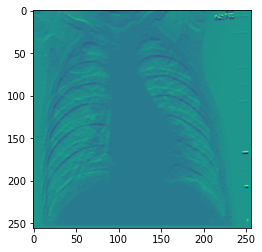

In [1111]:
# loading the model with the weights that minimized the loss function
model.load_weights('weights.hdf5')

#Visualization of convolution
#retrieving a convolutional layer
conv_1 = model.layers[2]
#Getting the weights of the first convolutional layer
weight_1 = conv_1.get_weights()
#first channel, in first kernel, in first layer
kernel = weight_1[0][...,0,0]
result = np.zeros(shape=(img.shape[1], img.shape[2]))

def convolution(img, kernel):
    img_stripped = np.squeeze(img)
    for i in range(img_stripped.shape[0] - 3):
        for j in range(img_stripped.shape[1] - 3):
            window = img_stripped[i:i+3, j:j+3] 
            result[i, j] = (window * kernel).sum()
    return result
  
#convolve with 3th image in test_set
out = convolution(img[5, :, :, :], kernel)
plt.imshow(out)
plt.show()

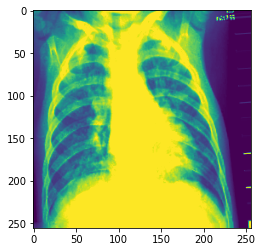

In [1112]:
#Show ith image before convolution
plt.imshow(np.squeeze(img[5]))
plt.show()

3/3 [==============================] - 0s 115ms/step - loss: 0.1674 - categorical_accuracy: 0.8939
0.16736398388942084
0.8939394
[0 0 0 0 2 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        26
           1       0.83      0.95      0.88        20
           2       0.85      0.85      0.85        20

    accuracy                           0.89        66
   macro avg       0.89      0.89      0.89        66
weighted avg       0.90      0.89      0.90        66



[Text(0, 0.5, 'Covid'), Text(0, 1.5, 'Normal'), Text(0, 2.5, 'Pneumonia')]

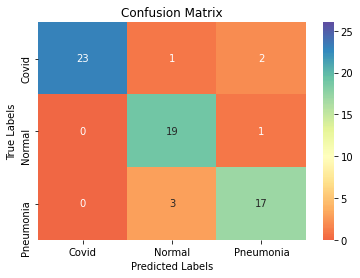

In [1114]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

#evaluating the model
loss, acc = model.evaluate(valid)
print(loss)
print(acc)
#getting predictions for futher evaluation
preds = model.predict(valid)
preds = np.argmax(preds, axis=1)
#looking at the values that were predicted and the true values
print(preds)
print(valid.classes)

print(classification_report(valid.classes, preds))
#f1 score: The weighted avg of precision and recall where each have the same weight best at 1 and worse at 0. Each 
#class has its own F1 score. F1 = 2 * (precision * recall) / (precision + recall). This is good when the classes are 
#are skewed

#creating confusion matrix plot with sns
cm=confusion_matrix(valid.classes, preds)
ax = plt.subplot()
sns.heatmap(cm, vmin=0, vmax=26, center=10, cmap="Spectral", annot=True)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels') 
ax.set_title('Confusion Matrix') 
ax.xaxis.set_ticklabels(['Covid', 'Normal', "Pneumonia"]) 
ax.yaxis.set_ticklabels(['Covid', 'Normal', "Pneumonia"])


In [1133]:
print('The accuracy of the models is ' + f'{acc*100:.{0}f}' + '%. For such a small dataset, I am impressed with the \
model\'s ability to predict      whether a person has Covid, Pneumonia, or Neither.')


The accuracy of the models is 89%. For such a small dataset, I am impressed with the model's ability to predict      whether a person has Covid, Pneumonia, or Neither.


The model has skewed classes and therefore the f1 parameter is used as an indicator of model performance as well. The f1 score is the weighted average of precision and recall. The highest f1 score is 1, and all three of our classese had f1 scores of around .9, so our model looks good from this standpoint as well.  

Looking at the confusion matrix shows the classes with their true labels vs their predictions. 